In [366]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA, KernelPCA
import skfda
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import (BSpline,Fourier,Monomial)
from skfda.exploratory.visualization import FPCAPlot

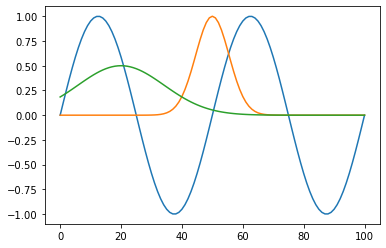

In [590]:
x = np.arange(0,101,1)

f1 = np.sin(2*np.pi*x / 50)
f2 = np.exp(-(x-50)**2/60)
f3 = 0.5*np.exp(-(x-20)**2/400)
#f4 = -0.3*np.exp(-(x-65)**2/150)
fs = [f1, f2, f3]
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
#plt.plot(x,f4)

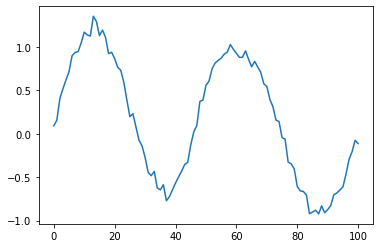

In [616]:
ps = [] 
means = [1,0.5,0.3,0.1]
for i in range(100):
    nps = np.zeros(len(f1))
    for j,f in enumerate(fs):
        nps += f*np.random.normal(means[j],0.5)
    ps.append(nps)
        
for i in range(len(ps)):
    ps[i] = ps[i] + np.random.normal(0, 0.05, len(ps[i]))
plt.plot(x,ps[3])

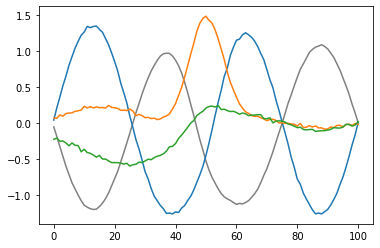

In [614]:
mean = np.mean(ps,axis=0)
psm = [p-mean for p in ps]

pca = PCA(n_components=None)
pca.fit(psm)
evar = pca.explained_variance_ratio_
#print(evar)
VARTH = 0.05
comps = pca.components_[evar>VARTH]
weights = pca.fit_transform(psm)[:,evar>VARTH]
rescal = np.max(np.abs(weights), axis=0)
comps = comps*rescal[:,np.newaxis]
weights = weights/rescal

#weights = np.concatenate([np.ones((len(weights),1)), weights], axis=1)
#comps = np.concatenate([-mean[np.newaxis,:], comps])
#print(weights)

plt.plot(-mean, 'gray')
for i,c in enumerate(comps):
    plt.plot(x,-c,c=f'C{i}')
#plt.plot(x,f1,c=f'C{8}', ls='--')
#plt.plot(x,f2,c=f'C{9}', ls='--')
#plt.plot(x,(f3+f4),c=f'C{10}', ls='--')


[0.73763583 0.15681359 0.09056356]
[[ 1.38990315 -2.51479485 -0.10662527]
 [ 0.5559472   1.0658998  -0.23261695]
 [-2.82398032 -0.31561319 -1.30374558]
 [-1.74850329 -2.85179593  0.96125073]
 [-5.26522769 -2.87142488 -0.4085481 ]
 [ 7.95814282 -1.12624889  0.20717932]
 [ 3.05621021 -0.16201596 -0.07683538]
 [ 1.92743255  1.43626535  0.86912599]
 [ 4.46536814 -2.66553329 -0.1744691 ]
 [-6.3119234  -0.88706932 -0.60722022]
 [-1.06265705  0.49601341  1.75815554]
 [ 2.61462514 -1.34552741 -0.72665424]
 [-3.91829302  2.55525388 -0.99497183]
 [-0.58244538  0.49956582  1.70938035]
 [ 3.10713963  0.43854076 -0.43347762]
 [ 1.79186908  0.78431717 -0.38756394]
 [-3.29395474  0.93242766  0.11911148]
 [-5.02767703  0.41239522 -0.74201817]
 [ 2.14884485 -0.07929079  0.20500143]
 [ 3.54886847  0.14839361 -0.24654549]
 [ 0.97958151 -0.50852273 -0.62909428]
 [-1.91089094 -0.9973485  -2.01598844]
 [-5.95940705 -0.22251349  0.71912343]
 [-1.10860696 -1.23680699  0.29128017]
 [ 2.16485289  2.58859743 -1.

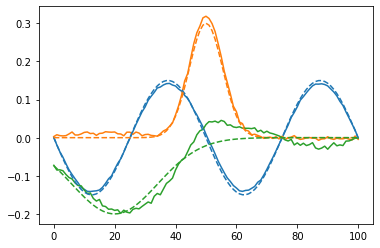

In [610]:
fd = skfda.FDataGrid(
    data_matrix=np.array(ps),
    grid_points=x,
)

#fd.plot()
#basis = BSpline(n_basis=30)
#basis_fd = fd.to_basis(basis)
#basis_fd.plot()

#fpca = FPCA(n_components=2)
fpca = FPCA(n_components=3)
weights = fpca.fit_transform(fd)
comps = fpca.components_.data_matrix
comps = comps[:,:,0]
print(fpca.explained_variance_ratio_)

#rescal = np.max(np.abs(weights), axis=0)
#comps = comps*rescal[:,np.newaxis]
#weights = weights/rescal
#print(weights)


for c in comps:
    plt.plot(x,c)
print(weights)
plt.plot(x,-0.15*f1,c=f'C{0}', ls='--')
plt.plot(x,0.3*(f2),c=f'C{1}', ls='--')
plt.plot(x,-0.4*(f3),c=f'C{2}', ls='--')

#plt.plot(x, mean + weights[2] @ comps)
#plt.plot(x, ps[2])

[0.74245832 0.18001192]
[[ 7.26107736e+00  6.50067764e-01]
 [ 6.36762882e-01  1.49428637e-01]
 [-2.08486979e+00 -7.82980716e-04]
 [ 2.41146142e+00 -3.03609529e-01]
 [-6.57643396e+00 -1.45713418e+00]
 [-3.92815033e-01  5.36223196e-01]
 [ 2.71613551e-01 -1.10070846e+00]
 [-2.59696161e+00  9.96728722e-01]
 [-2.47960068e+00 -1.04920072e+00]
 [ 5.06183456e-01 -1.04764047e+00]
 [ 4.50748728e+00 -1.03474296e+00]
 [ 1.67509720e+00  4.41683837e-01]
 [ 4.77620720e+00 -2.99240231e+00]
 [-2.39595504e+00 -8.46788664e-01]
 [ 1.56038143e+00 -7.00314772e-01]
 [-5.02957816e+00 -1.44141408e+00]
 [ 1.52995321e+00 -1.64009753e-01]
 [ 1.64325337e-01  1.54687956e+00]
 [-3.22077167e+00 -2.01011842e+00]
 [-2.76290877e+00 -4.55245681e-01]
 [-2.10953996e+00 -1.16995445e+00]
 [ 3.47004342e+00 -6.18352226e-01]
 [ 5.82407840e+00  8.75747946e-01]
 [-4.08695849e+00 -4.00163305e-02]
 [ 3.99198422e+00 -8.64970535e-01]
 [-6.49962957e+00 -2.38433282e+00]
 [-4.35553513e+00  1.72170229e+00]
 [-6.90281978e-01 -9.95329650e-

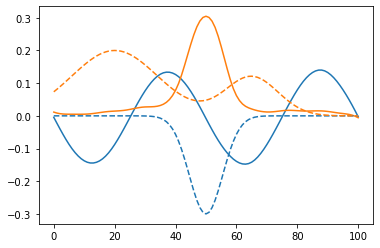

In [577]:
fd = skfda.FDataGrid(
    data_matrix=np.array(ps),
    grid_points=x,
)

#fd.plot()
basis = BSpline(n_basis=30)
basis_fd = fd.to_basis(basis)
bfd_grid = basis_fd.to_grid(x).data_matrix[:,:,0]
#basis_fd.plot()

#fpca = FPCA(n_components=2)
fpca = FPCA(n_components=2, components_basis=BSpline(n_basis=20))
weights = fpca.fit_transform(basis_fd)
#comps = fpca.components_.data_matrix
comps = fpca.components_.to_grid(x).data_matrix
comps = comps[:,:,0]
print(fpca.explained_variance_ratio_)

#rescal = np.max(np.abs(weights), axis=0)
#comps = comps*rescal[:,np.newaxis]
#weights = weights/rescal
#print(weights)

for c in comps:
    plt.plot(x,c)
print(weights)
plt.plot(x,-0.3*(f2),c=f'C{0}', ls='--')
plt.plot(x,0.4*(f3-f4),c=f'C{1}', ls='--')

#bfd_mean = bfd_grid.mean(axis=0)
##plt.plot(x, bfd_mean)
#i = 4
#plt.plot(x, bfd_mean + weights[i] @ comps)
#plt.plot(x, ps[i])

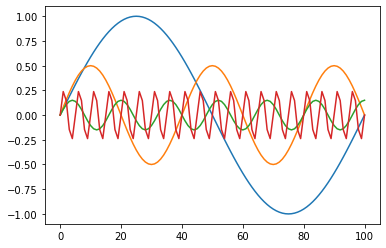

In [487]:
x = np.arange(0,101,1)

f1 = np.sin(2*np.pi*x/100 * 1)
f2 = np.sin(2*np.pi*x/100 * 2.5)*0.5
f3 = np.sin(2*np.pi*x/100 * 6.25)*0.15
f4 = np.sin(2*np.pi*x/100 * 20)*0.25
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
plt.plot(x,f4)

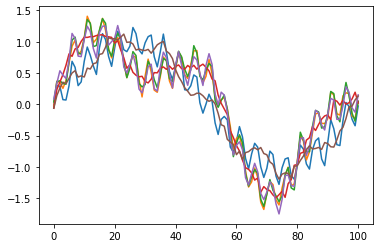

In [505]:
ps = [] 
ps = [f1+f4, f1+f2+f4, f1+f2+0.2*f3+f4, f1+f2+0.5*f3, f1+f2+0.7*f3+f4, f1+f3]
for i in range(len(ps)):
    ps[i] = ps[i] + np.random.normal(0, 0.05, len(ps[i]))
    plt.plot(x,ps[i])

[0.93431084 0.05702839]
[[ 2.25868573  0.56550872]
 [-1.24518156  0.39201033]
 [-1.19223684  0.21357705]
 [-1.13962373 -0.280743  ]
 [-1.10662583 -0.36940708]
 [ 2.42498223 -0.52094602]]


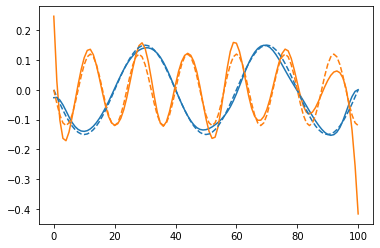

In [517]:
fd = skfda.FDataGrid(
    data_matrix=np.array(ps),
    grid_points=x,
)

#fd.plot()
basis = BSpline(n_basis=50)
basis_fd = fd.to_basis(basis)
bfd_grid = basis_fd.to_grid(x).data_matrix[:,:,0]
#basis_fd.plot()

#fpca = FPCA(n_components=2)
fpca = FPCA(n_components=2, components_basis=BSpline(n_basis=20))
weights = fpca.fit_transform(basis_fd)
#comps = fpca.components_.data_matrix
comps = fpca.components_.to_grid(x).data_matrix
comps = comps[:,:,0]
print(fpca.explained_variance_ratio_)

#rescal = np.max(np.abs(weights), axis=0)
#comps = comps*rescal[:,np.newaxis]
#weights = weights/rescal
#print(weights)

for c in comps:
    plt.plot(x,c)
print(weights)
plt.plot(x,-0.3*(f2),c=f'C{0}', ls='--')
plt.plot(x,-0.8*(f3),c=f'C{1}', ls='--')

#bfd_mean = bfd_grid.mean(axis=0)
##plt.plot(x, bfd_mean)
#i = 4
#plt.plot(x, bfd_mean + weights[i] @ comps)
#plt.plot(x, ps[i])

[0.76626412 0.20026   ]
[[ 2.11628766 -1.13637211]
 [-1.32504018 -0.42352055]
 [-1.2906099  -0.4813461 ]
 [-0.91968262  1.39165545]
 [-1.18722377 -0.21335776]
 [ 2.60626882  0.86294107]]


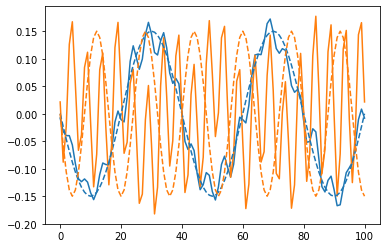

In [543]:
fd = skfda.FDataGrid(
    data_matrix=np.array(ps),
    grid_points=x,
)

#fd.plot()
basis = Fourier(n_basis=50)
basis_fd = fd.to_basis(basis)
bfd_grid = basis_fd.to_grid(x).data_matrix[:,:,0]
#basis_fd.plot()

#fpca = FPCA(n_components=2)
fpca = FPCA(n_components=2, components_basis=Fourier(n_basis=50))
weights = fpca.fit_transform(basis_fd)
#comps = fpca.components_.data_matrix
comps = fpca.components_.to_grid(x).data_matrix
comps = comps[:,:,0]
print(fpca.explained_variance_ratio_)

#rescal = np.max(np.abs(weights), axis=0)
#comps = comps*rescal[:,np.newaxis]
#weights = weights/rescal
#print(weights)

for c in comps:
    plt.plot(x,c)
print(weights)
plt.plot(x,-0.3*(f2),c=f'C{0}', ls='--')
plt.plot(x,-1*(f3),c=f'C{1}', ls='--')

#bfd_mean = bfd_grid.mean(axis=0)
#plt.plot(x, bfd_mean)
#i = 1
#plt.plot(x, bfd_mean + weights[i] @ comps)
#plt.plot(x, ps[i])